# Analysing river flow data


## Step 1: Data Collection

### Tasks: 
- Choose a reliable source for historical river flow data: [National River Flow Archive](https://nrfa.ceh.ac.uk)

- Choose a gauging station: [Bathford station](https://nrfa.ceh.ac.uk/data/station/info/53018) on the River Avon, my local river

- Download the data for Bathford station. This consists of 2 CSV files: *Gauged Daily Flow Data (GDF)* and *Catchment Daily Rainfall Data (CDR)* 

- Create a new folder for my project in my IDE editor, VS Code, and save the CSV files in that folder. Create a new jupyter notebook file for my project in same folder

- Create a new virtual environment for my project, which includes pip installing the necessary library packages: more info on those steps in the project wiki

- Import the libraries

- Load the data from both CSV files into a single combined DataFrame

            Rainfall   Flow
Date                       
1969-10-28       0.0  3.958
1969-10-29       0.0  4.210
1969-10-30       0.0  4.480
1969-10-31       0.0  4.205
1969-11-01       0.1  3.830
            Rainfall   Flow
Date                       
2017-12-27       0.2  98.23
2017-12-28       4.3  78.77
2017-12-29       4.4  49.72
2017-12-30       5.8  53.17
2017-12-31       3.5  52.10
(17597, 2)
Rainfall    float64
Flow        float64
dtype: object
Rainfall    0
Flow        0
dtype: int64
0


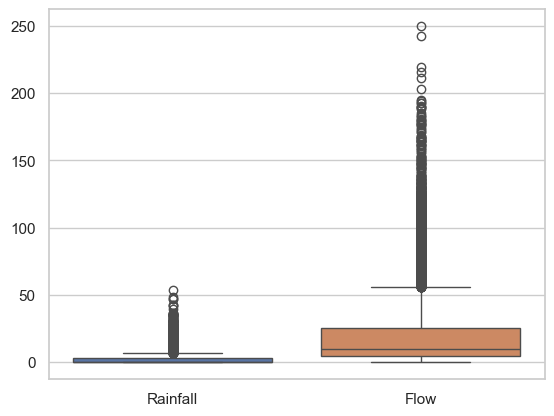

            Rainfall    Flow
Date                        
1969-11-06      13.2   4.004
1969-11-08       7.0   4.283
1969-11-09       9.4   5.806
1969-11-11      13.3   8.994
1969-11-14      13.7  12.010
...              ...     ...
2017-12-14       3.9  58.370
2017-12-25      15.4  21.630
2017-12-26      21.3  71.250
2017-12-27       0.2  98.230
2017-12-28       4.3  78.770

[2915 rows x 2 columns]
Percentage of outliers: 16.57%
           Rainfall          Flow
count  17597.000000  17597.000000
mean       2.319708     19.773551
std        4.306125     24.778688
min        0.000000      0.122000
25%        0.000000      4.725000
50%        0.300000      9.534000
75%        2.800000     25.160000
max       53.200000    249.900000


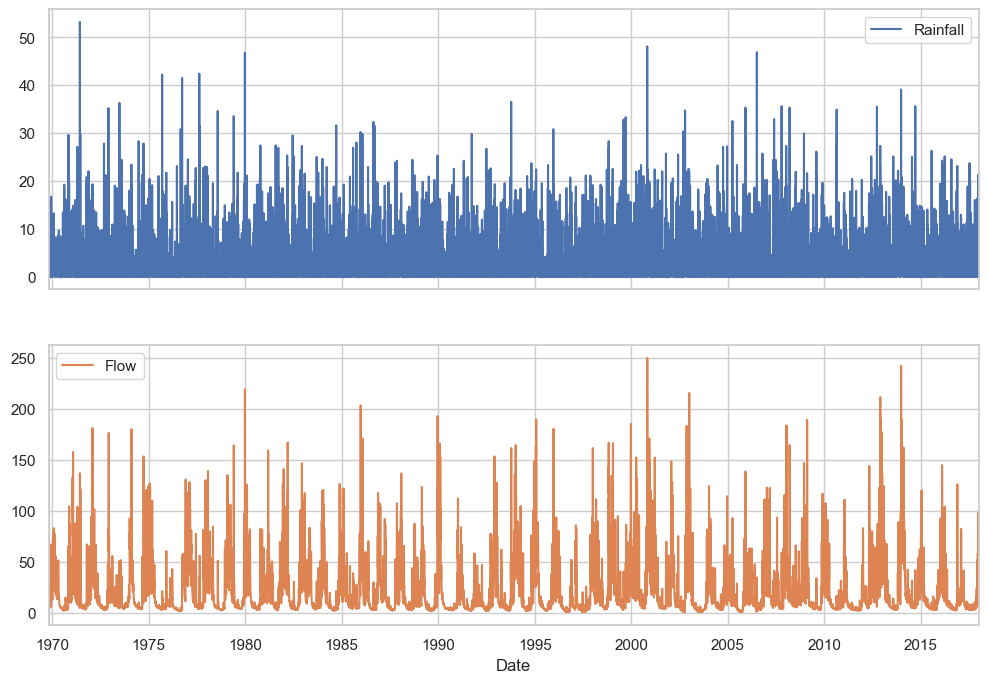

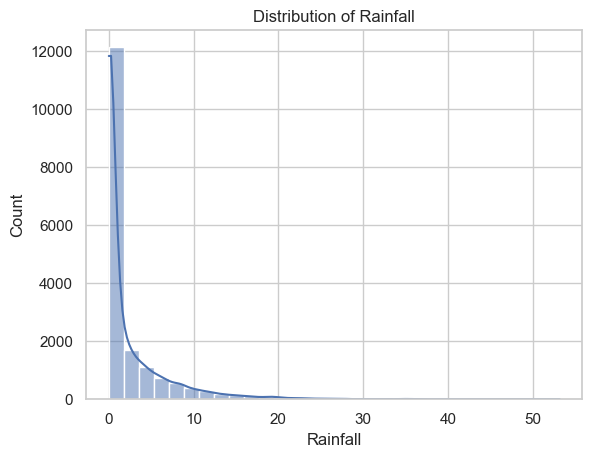

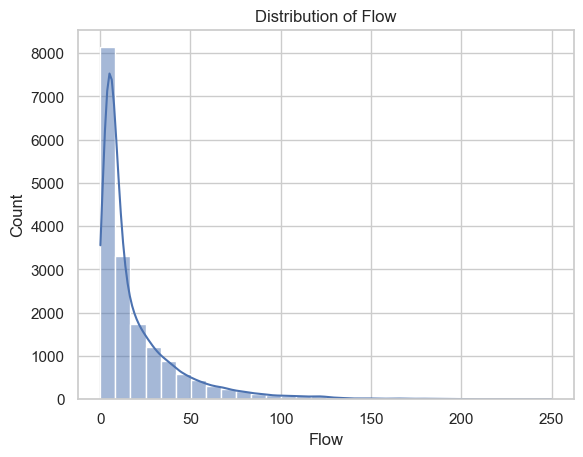

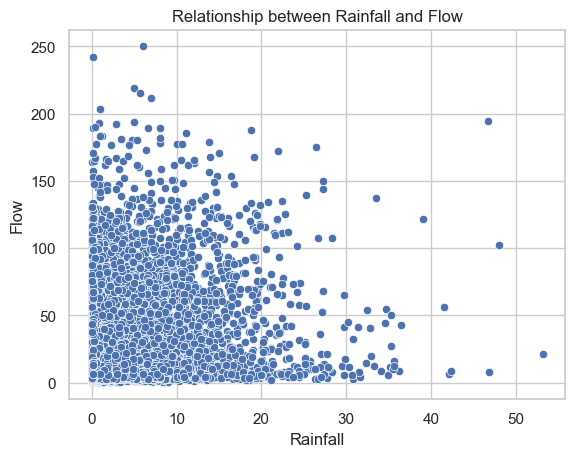

Correlation between Rainfall and Flow: 0.27


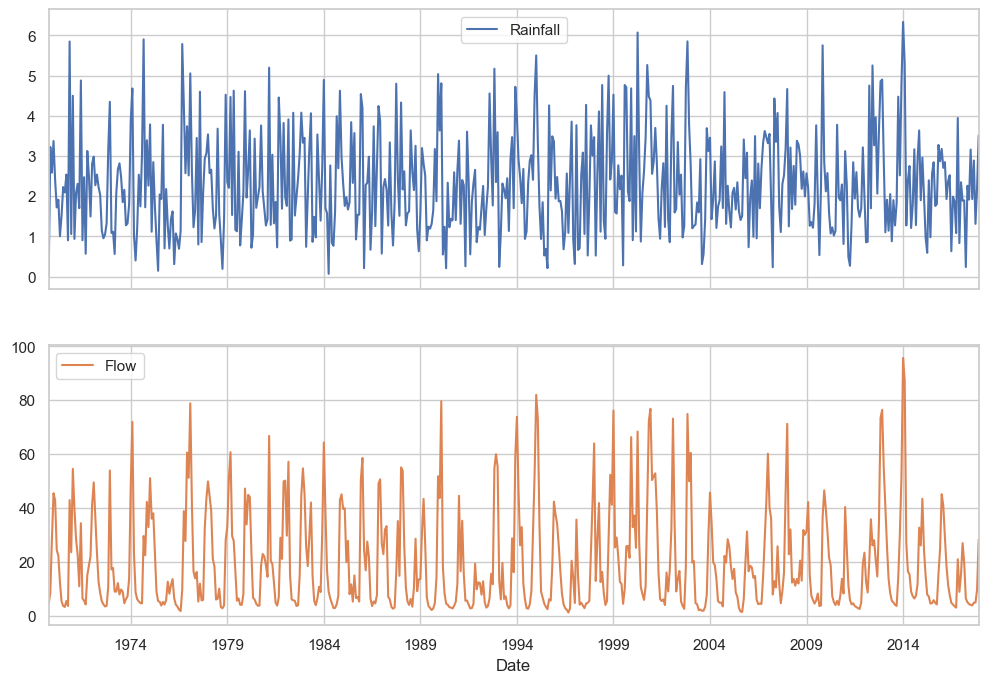

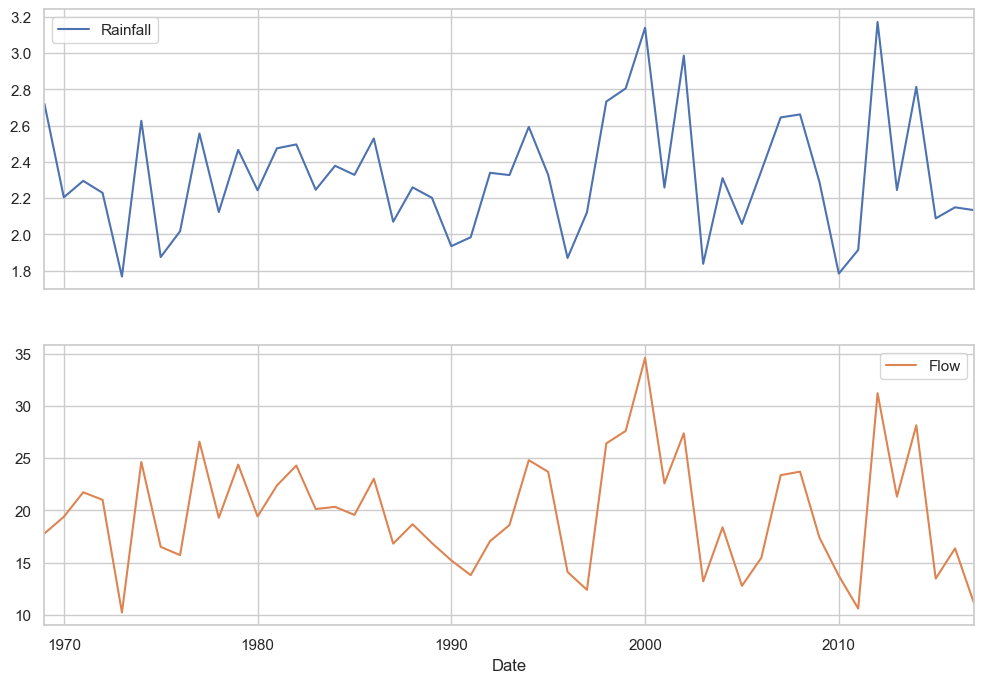

In [5]:
# Step 1: Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Importing datasets; removing first 20 metadata rows; parsing dates; setting index column

# The rainfall csv covers the period from 1969-10-27 to 2022-09-30. The flow csv covers the period from 1961-01-01 to 2017-12-31. We need to read the data from the same period in both files.

# Calculate the number of rows to read in the flow csv file to match the end period in the rainfall csv file.
rows_to_read = 17616 - 20 + 1

# Read the csv files, skipping extra rows in the rainfall csv file to match the start period in the flow csv file.
df_rain = pd.read_csv('53018_cdr.csv',skiprows=3241, parse_dates=['1969-10-27'], index_col='1969-10-27')
df_flow = pd.read_csv('53018_gdf.csv',skiprows=20, nrows=rows_to_read, parse_dates=['1969-10-27'], index_col='1969-10-27')

#Step 3: Selecting desired columns
columns_from_df_rain = df_rain[['0.000']]
columns_from_df_flow = df_flow[['3.998']]

#Step 4: Merging the two dataframes
combined_df = pd.concat([columns_from_df_rain, columns_from_df_flow], axis=1)

# Renaming csv column names to Rainfall and Flow
combined_df = combined_df.rename(columns={
    '0.000': 'Rainfall',
    '3.998': 'Flow'
})

# Rename the index column
combined_df.index.name = 'Date'

# Display the combined DataFrame to check columns start at same date and end at same date
print(combined_df.head( ))
print(combined_df.tail(5))

# Check the shape of the combined DataFrame
print(combined_df.shape)
# The combined DataFrame has 17616 rows and 2 columns
total_rows = combined_df.shape[0]

#Step 5: Cleaning the data 

#Check for consistency in data format
print(combined_df.dtypes) #both columns are float64

# Check for missing values 
print(combined_df.isnull().sum()) #no missing values

# Check for duplicates in Date column    
print(combined_df.index.duplicated().sum()) #no duplicates

#Check for outliers
sns.boxplot(data=combined_df)
plt.show() 

#Identify outliers in the combined DataFrame using the IQR method
Q1 = combined_df.quantile(0.25)
Q3 = combined_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((combined_df < (Q1 - 1.5 * IQR)) | (combined_df > (Q3 + 1.5 * IQR)))

# Display the rows with outliers 
print(combined_df[outliers.any(axis=1)])

# Calculate the number of rows with outliers
outlier_rows = outliers.any(axis=1).sum()

# Calculate the percentage of outliers
outlier_percentage = (outlier_rows / total_rows) * 100

print(f"Percentage of outliers: {outlier_percentage:.2f}%")

#The percentage of outliers is 16.57%. This is a significant percentage of the dataset, but in the context of hydrological data, it is not uncommon to have outliers due to extreme weather events. Therefore, we will keep the outliers in the dataset for now.

#Step 6: Exploratory Data Analysis

#Calculating Summary Statistics
summary_statistics = combined_df.describe()
print(summary_statistics)

#Key Insights:
#Rainfall:
#The majority of rainfall observations are low, with a median of 0.30 mm and 75% of observations below 2.80 mm.
#There are some extreme values, with a maximum of 53.20 mm.
#The distribution is right-skewed, as indicated by the difference between the mean and median.

#Flow:
#The flow data also shows a right-skewed distribution, with a median of 9.53 m³/s and 75% of observations below 25.16 m³/s.
#There are significant outliers, with a maximum flow of 249.90 m³/s.
#The high standard deviation (24.78 m³/s) indicates considerable variability in river flow.

#Plot time series of river flow and rainfall
combined_df.plot(subplots=True, figsize=(12, 8))
plt.show()

#Plotting the distribution of river flow and rainfall
sns.histplot(data=combined_df, x='Rainfall', bins=30, kde=True)
plt.title('Distribution of Rainfall')
plt.show()

sns.histplot(data=combined_df, x='Flow', bins=30, kde=True)
plt.title('Distribution of Flow')
plt.show()

#Summary of distribution of river flow and rainfall
#The distribution of rainfall is right-skewed, with most values concentrated around lower rainfall levels. The distribution of flow is also right-skewed, with most values concentrated around lower flow levels. Both variables have a wide range of values, indicating variability in the data.

#Plotting the relationship between river flow and rainfall
sns.scatterplot(data=combined_df, x='Rainfall', y='Flow')
plt.title('Relationship between Rainfall and Flow')
plt.show()

#Summary of relationship between river flow and rainfall
#The scatter plot shows the relationship between rainfall and flow. There is a positive relationship between the two variables, with higher flow values following periods of higher rainfall. However, the relationship is not linear, and there is considerable variability in the data.

#Calculating the correlation between river flow and rainfall
correlation = combined_df['Rainfall'].corr(combined_df['Flow'])
print(f"Correlation between Rainfall and Flow: {correlation:.2f}")

#The correlation between rainfall and flow is 0.27, indicating a weak positive correlation between the two variables.

#Exploring the relationship between river flow and rainfall over time   
# Calculate the monthly average of rainfall and flow
monthly_avg = combined_df.resample('ME').mean()  

# Plot the monthly average of rainfall and flow
monthly_avg.plot(subplots=True, figsize=(12, 8))
plt.show()

#The plots show the monthly average of rainfall and flow over time. There is a clear seasonal pattern in both variables, with higher values during certain months of the year. The relationship between rainfall and flow is evident in the plots, with flow increasing following periods of higher rainfall.

#Trend Analysis
# Calculate the annual average of rainfall and flow
annual_avg = combined_df.resample('YE').mean()

# Plot the annual average of rainfall and flow
annual_avg.plot(subplots=True, figsize=(12, 8))
plt.show()

#The plots show the annual average of rainfall and flow over time. There is a clear trend in both variables, with fluctuations over the years. The relationship between rainfall and flow is evident in the plots, with flow increasing following periods of higher rainfall.

#The trend analysis shows that both rainfall and flow have increased over the years, with some fluctuations in between. The relationship between rainfall and flow is evident in the plots, with flow increasing following periods of higher rainfall.

#Summary
#In this project, we performed exploratory data analysis on a dataset containing daily rainfall and river flow data. We cleaned the data, calculated summary statistics, and visualized the relationship between rainfall and flow. We also explored the seasonal and annual trends in the data. The analysis showed a weak positive correlation between rainfall and flow, with flow increasing following periods of higher rainfall. The trend analysis revealed an overall increase in both rainfall and flow over the years, with fluctuations in between. The findings provide valuable insights into the relationship between rainfall and river flow, which can be useful for water resource management and flood forecasting.

